In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/FYP/normalized_dataset-1m.csv")

In [3]:
data = data.drop("Unnamed: 0", axis = 1)

In [4]:
data

,userId,movieId,rating,prediction,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
0,673,148,5.0,2.943212,0.209787,1.000000,0.195656,0.137711,0.443711,0.294171,...,0.448945,0.387475,0.391159,0.396294,0.193572,0.175393,0.258615,0.349546,0.454274,0.175047
1,4387,148,1.0,2.531729,0.209787,1.000000,0.195656,0.137711,0.443711,0.294171,...,0.448945,0.387475,0.391159,0.396294,0.193572,0.175393,0.258615,0.349546,0.454274,0.175047
2,2383,148,2.0,2.703885,0.209787,1.000000,0.195656,0.137711,0.443711,0.294171,...,0.448945,0.387475,0.391159,0.396294,0.193572,0.175393,0.258615,0.349546,0.454274,0.175047
3,1242,148,3.0,2.788594,0.209787,1.000000,0.195656,0.137711,0.443711,0.294171,...,0.448945,0.387475,0.391159,0.396294,0.193572,0.175393,0.258615,0.349546,0.454274,0.175047
4,840,148,1.0,3.246411,0.209787,1.000000,0.195656,0.137711,0.443711,0.294171,...,0.448945,0.387475,0.391159,0.396294,0.193572,0.175393,0.258615,0.349546,0.454274,0.175047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249075,2280,3910,3.0,4.124915,0.851341,0.696987,0.437636,0.609575,0.600440,0.321132,...,0.467200,0.596890,0.498390,0.464768,0.754326,0.772314,0.459607,0.618118,0.383681,0.521351
249076,1753,3910,4.0,3.976731,0.851341,0.696987,0.437636,0.609575,0.600440,0.321132,...,0.467200,0.596890,0.498390,0.464768,0.754326,0.772314,0.459607,0.618118,0.383681,0.521351
249077,1449,3910,4.0,3.354278,0.851341,0.696987,0.437636,0.609575,0.600440,0.321132,...,0.467200,0.596890,0.498390,0.464768,0.754326,0.772314,0.459607,0.618118,0.383681,0.521351
249078,3371,3910,1.0,3.737503,0.851341,0.696987,0.437636,0.609575,0.600440,0.321132,...,0.467200,0.596890,0.498390,0.464768,0.754326,0.772314,0.459607,0.618118,0.383681,0.521351


In [5]:
actual_ratings_before = data['rating']
predicted_ratings_before = data['prediction']
squared_error = (actual_ratings_before - predicted_ratings_before) ** 2
mse_before = np.mean(squared_error)
print(f"Old MSE value: {round(mse_before,4)}")
rmse_before = np.sqrt(mse_before)
print(f"Old RMSE value: {round(rmse_before,4)}")

Old MSE value: 0.7782
Old RMSE value: 0.8821


In [6]:
mae_before = mean_absolute_error(actual_ratings_before, predicted_ratings_before)
print("Mean Absolute Error:", round(mae_before,4))

Mean Absolute Error: 0.708


In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): Array of true values.
        y_pred (array-like): Array of predicted values.

    Returns:
        float: The MAPE value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [8]:
mape_before = mean_absolute_percentage_error(actual_ratings_before, predicted_ratings_before)
print("MAPE:", round(mape_before,4))

MAPE: 25.7437


In [9]:
data = data[data['rating'] > 3]

In [10]:
for user_id, user_data in data.groupby('userId'):
  if user_id == 415:
    print(user_data[['userId', 'movieId', 'rating', 'prediction']])

        userId  movieId  rating  prediction
5223       415     1270     4.0    3.679240
9547       415      898     4.0    4.249185
21754      415     1274     4.0    3.752147
26715      415     3435     4.0    4.365468
28932      415      908     5.0    4.337287
34007      415      973     4.0    3.875891
38181      415     2022     4.0    3.664999
38296      415     2502     4.0    3.598389
41153      415     1125     4.0    3.710720
46188      415      111     4.0    4.142016
49672      415     1300     4.0    4.113367
58831      415       52     4.0    3.563089
59959      415     3060     4.0    3.781267
63420      415      348     4.0    3.679387
63790      415     1663     4.0    3.531232
68198      415     1380     4.0    3.264053
71449      415     2729     5.0    3.885550
74017      415     1301     4.0    3.863748
84984      415     1357     4.0    3.663265
85953      415     1748     4.0    3.748846
88038      415     3039     4.0    3.605383
88909      415     2664     4.0 

In [11]:
filtered_data = []

In [12]:
for user_id, user_data in data.groupby('userId'):
    # Extract CNN features for the user's rated movies
    user_cnn_features = user_data.drop(["userId", "movieId", 'rating', 'prediction'], axis=1).values

    # Compute cosine similarity between the user's rated movies
    similarities = cosine_similarity(user_cnn_features, user_cnn_features)[0]  # We select the first row since similarities will be a 1xN array

    # Filter the similarities based on ratings
    similar_indices_filtered = np.where(user_data['rating'] > 3.0, similarities, -np.inf)

    # Sort the indices of the most similar movies
    most_similar_indices = np.argsort(similar_indices_filtered)[-10:]  # Select the last 10 indices

    # Calculate the absolute difference between actual and predicted ratings
    diff_ratings = np.abs(user_data['rating'] - user_data['prediction'])

    # Filter the indices based on the minimum difference in ratings
    min_diff_indices = np.argsort(diff_ratings)[:20]

    # Intersection of top similar indices and minimum difference indices
    final_indices = np.intersect1d(most_similar_indices, min_diff_indices)

    # Append the filtered rows to new_data DataFrame
    filtered_data.append(user_data.iloc[final_indices])

In [13]:
new_data = pd.DataFrame(columns=data.columns)

In [14]:
new_data = pd.concat(filtered_data)

In [15]:
for user_id, user_data in new_data.groupby('userId'):
  if user_id == 15:
    print(user_data[['userId', 'movieId', 'rating', 'prediction']])

        userId  movieId  rating  prediction
40538       15     3108     4.0    2.881492
44755       15      367     4.0    2.917292
60181       15     3147     4.0    3.937893
163345      15       73     4.0    3.431672
189319      15      141     4.0    3.108763
200149      15     2707     4.0    3.296409
229440      15     3176     4.0    2.659530
240500      15     2501     4.0    3.673138
240735      15     3148     4.0    3.512086
248475      15     2706     4.0    3.527884


In [16]:
new_data.describe()

,userId,movieId,rating,prediction,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31
count,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,...,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000,39558.000000
mean,3025.014258,1801.555134,4.364301,3.756904,0.446951,0.475568,0.373894,0.498959,0.436405,0.547511,...,0.550325,0.545671,0.532351,0.547119,0.534569,0.527686,0.528074,0.542165,0.548992,0.525364
std,1752.085722,1085.002352,0.481240,0.506737,0.356677,0.336279,0.311004,0.313263,0.270488,0.266395,...,0.194152,0.195551,0.188003,0.187070,0.195148,0.193095,0.185568,0.201518,0.194046,0.180270
min,1.000000,1.000000,4.000000,0.467819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1495.000000,969.000000,4.000000,3.447393,0.100200,0.183497,0.042093,0.237365,0.240239,0.365129,...,0.420287,0.405347,0.394246,0.425530,0.399373,0.402323,0.398340,0.411487,0.418716,0.396640
50%,3037.000000,1587.000000,4.000000,3.780492,0.414461,0.444348,0.357395,0.518757,0.440138,0.570992,...,0.569037,0.537888,0.535083,0.550585,0.536305,0.530004,0.527790,0.525734,0.547096,0.534942
75%,4555.000000,2761.000000,5.000000,4.098567,0.774292,0.764764,0.588932,0.750076,0.614914,0.743098,...,0.689189,0.665360,0.663578,0.677107,0.668618,0.659079,0.644116,0.679681,0.685251,0.644290
max,6040.000000,3952.000000,5.000000,5.464956,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
new_data = new_data[['userId', 'movieId', 'rating', 'prediction']]

In [18]:
new_data = new_data.drop_duplicates()

In [19]:
actual_ratings_after = new_data['rating']
predicted_ratings_after = new_data['prediction']
squared_error = (actual_ratings_after - predicted_ratings_after) ** 2
mse_after = np.mean(squared_error)
print(f"New MSE value: {round(mse_after,4)}")
rmse_after = np.sqrt(mse_after)
print(f"New RMSE value: {round(rmse_after,4)}")

New MSE value: 0.6914
New RMSE value: 0.8315


In [20]:
mae_after = mean_absolute_error(actual_ratings_after, predicted_ratings_after)
print("Mean Absolute Error:", round(mae_after,4))

Mean Absolute Error: 0.6648


In [21]:
mape_after = mean_absolute_percentage_error(actual_ratings_after, predicted_ratings_after)
print("MAPE:", round(mape_after,4))

MAPE: 14.7669


In [22]:
labels = ['MAE', 'MSE', 'RMSE']
metrics_als = [mae_before, mse_before, rmse_before]
metrics_svd = [0.6887, 0.7697, 0.8773]
metrics_hybrid = [mae_after, mse_after, rmse_after]

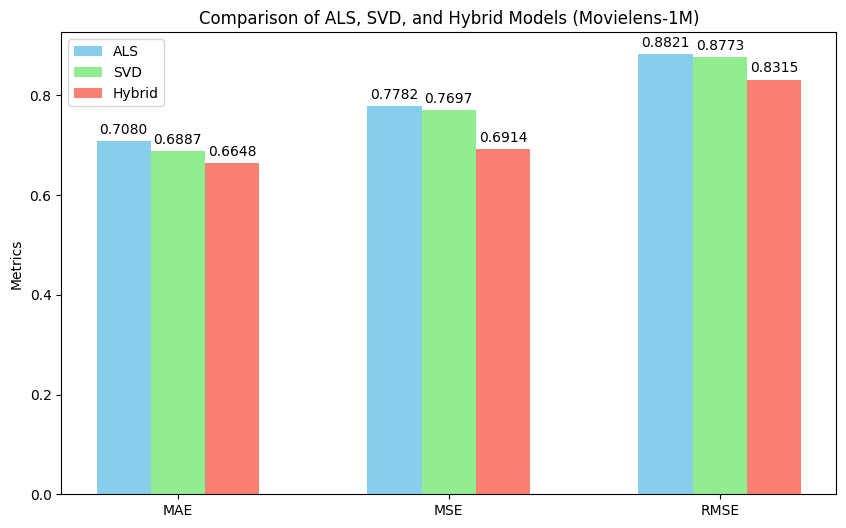

In [24]:
x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, metrics_als, width, label='ALS', color='skyblue')
rects2 = ax.bar(x, metrics_svd, width, label='SVD', color='lightgreen')
rects3 = ax.bar(x + width, metrics_hybrid, width, label='Hybrid', color='salmon')

ax.set_ylabel('Metrics')
ax.set_title('Comparison of ALS, SVD, and Hybrid Models (Movielens-1M)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


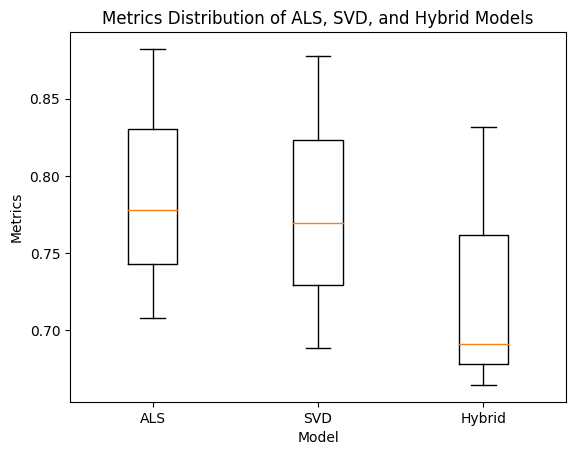

In [25]:
# Box Plot
plt.boxplot([metrics_als, metrics_svd, metrics_hybrid], labels=['ALS', 'SVD', 'Hybrid'])
plt.xlabel('Model')
plt.ylabel('Metrics')
plt.title('Metrics Distribution of ALS, SVD, and Hybrid Models')
plt.show()

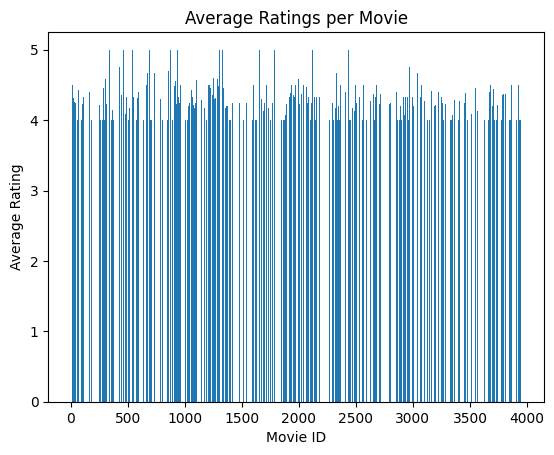

In [26]:
average_ratings_per_movie = new_data.groupby('movieId')['rating'].mean()
plt.bar(average_ratings_per_movie.index, average_ratings_per_movie.values)
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings per Movie')
plt.show()

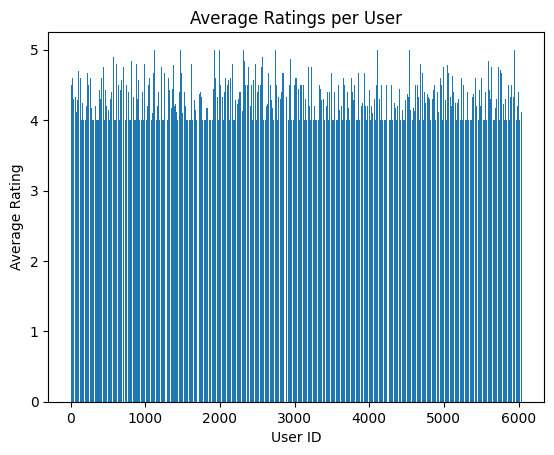

In [27]:
average_ratings_per_user = new_data.groupby('userId')['rating'].mean()
plt.bar(average_ratings_per_user.index, average_ratings_per_user.values)
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.title('Average Ratings per User')
plt.show()


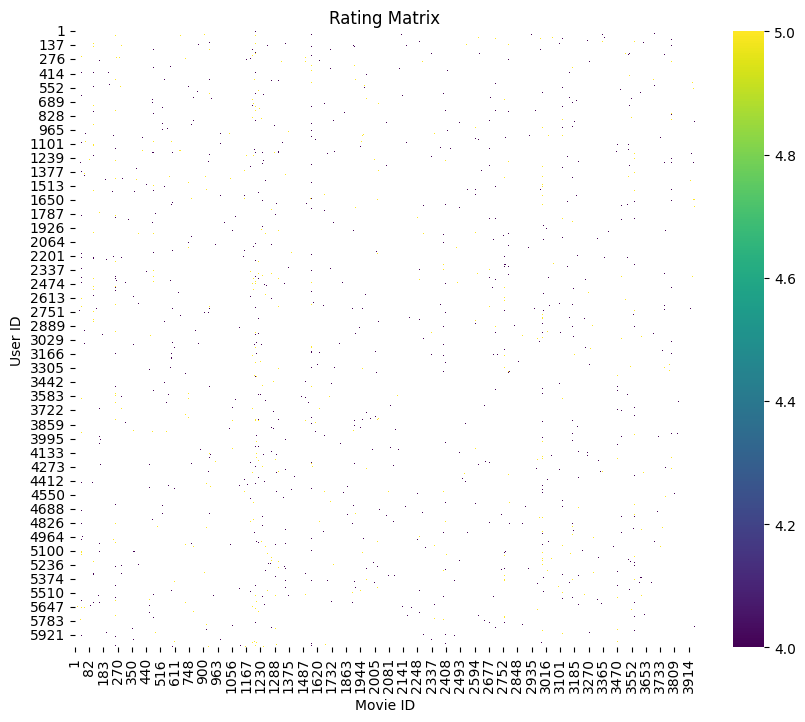

In [28]:
import seaborn as sns
rating_matrix = new_data.pivot_table(index='userId', columns='movieId', values='rating')
plt.figure(figsize=(10, 8))
sns.heatmap(rating_matrix, cmap='viridis')
plt.xlabel('Movie ID')
plt.ylabel('User ID')
plt.title('Rating Matrix')
plt.show()

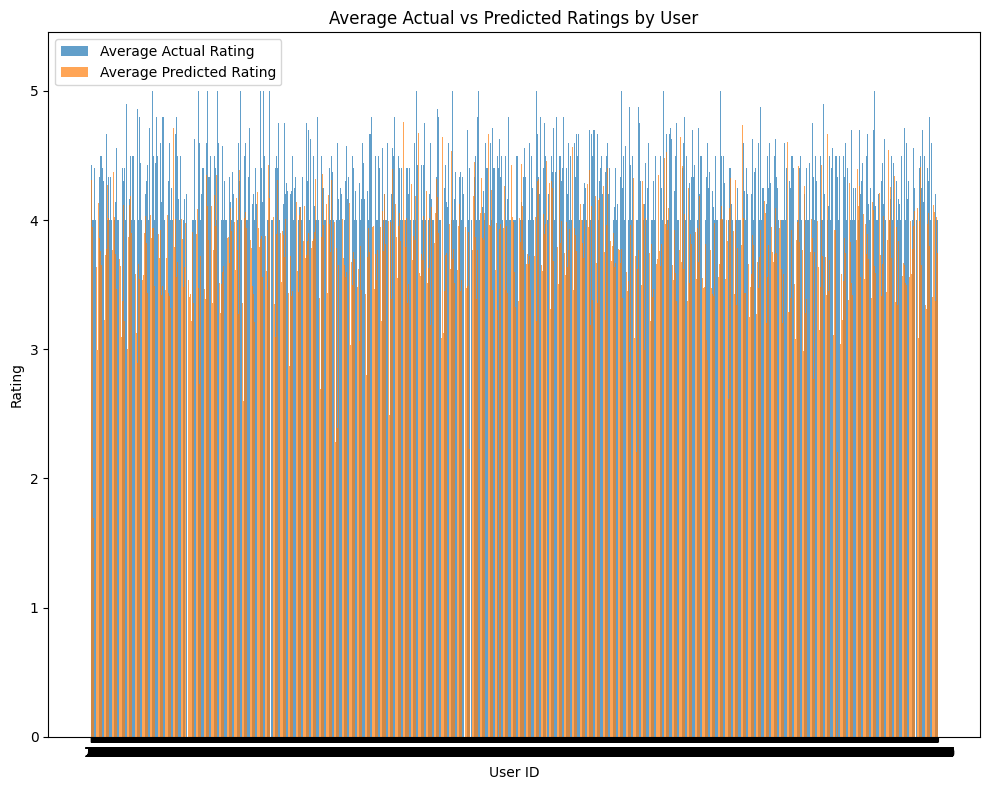

In [29]:
average_ratings = new_data.groupby('userId').agg({'rating': 'mean', 'prediction': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 8))
bar_width = 0.70

plt.bar(average_ratings['userId'], average_ratings['rating'], bar_width, label='Average Actual Rating', alpha=0.7)
plt.bar(average_ratings['userId'] + bar_width, average_ratings['prediction'], bar_width, label='Average Predicted Rating', alpha=0.7)

plt.xlabel('User ID')
plt.ylabel('Rating')
plt.title('Average Actual vs Predicted Ratings by User')
plt.xticks(average_ratings['userId'] + bar_width / 2, average_ratings['userId'])
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
new_data.to_csv("/content/drive/MyDrive/FYP/final_prediction_1m.csv", index=False)